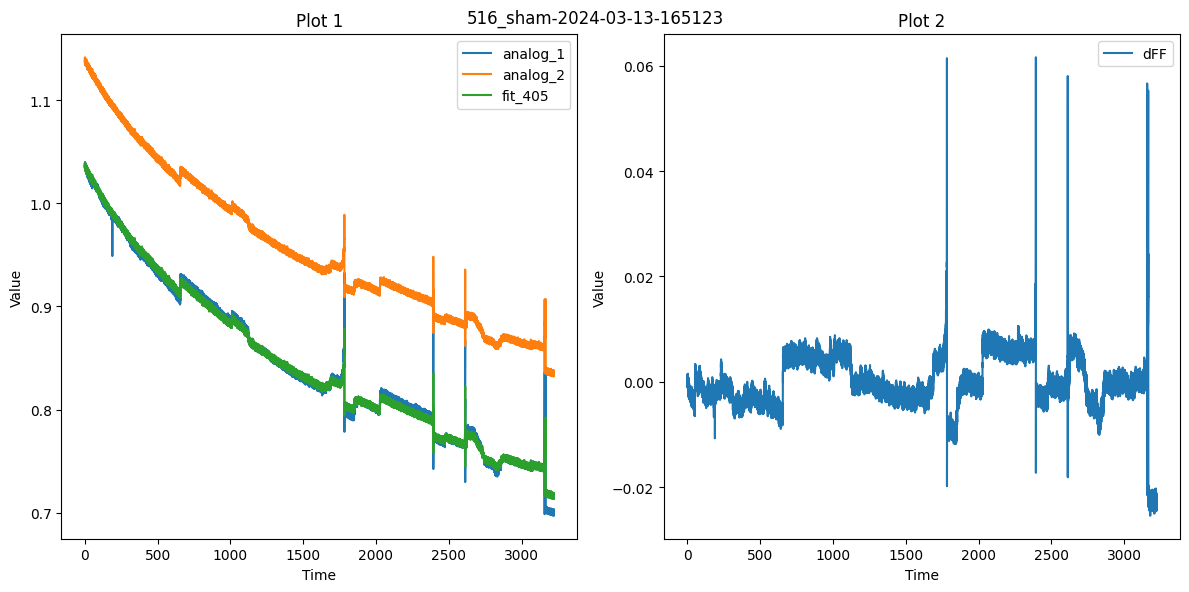

In [2]:
import os
import tkinter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from data_import import import_ppd
from scipy.signal import savgol_filter
from scipy.stats import sem
from scipy.ndimage import gaussian_filter1d

# Define the PPD file path
from operator import index
from random import sample

sampling_rate = 130

#ppd_file_path = r'H:\Jun\sensory_stim\astro\control\1193-2024-08-22-131301.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\control\1194-2024-08-22-151631.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\control\1195-2024-08-22-165525.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\control\1196-2024-08-23-103346.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\control\1198-2024-08-23-142816.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\control\1199-2024-08-23-164310.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\control\1200-2024-08-26-112939.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\control\1201-2024-08-26-151315.ppd'

#ppd_file_path = r'H:\Jun\sensory_stim\astro\sni\1193-2024-09-25-100942.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\sni\1194-2024-09-25-124601.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\sni\1195-2024-09-25-160328.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\sni\1196-2024-09-26-140713.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\sham\1198-2024-09-26-155349.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\sham\1199-2024-09-27-114043.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\sham\1200-2024-10-02-120908.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\astro\sham\1201-2024-10-01-144637.ppd'


#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1489_ctrl-2024-11-06-150844.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1490_ctrl-2024-11-06-164643.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1491_ctrl-2024-11-06-181935.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1492_ctrl-2024-11-06-230432.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1497_ctrl-2024-11-07-121739.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1498_ctrl-2024-11-07-144614.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1499_ctrl-2024-11-07-155720.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1500_ctrl-2024-11-07-172610.ppd'

#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1497_sni-2024-11-26-162958.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1498_sni-2024-11-27-114736.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1499_sni-2024-11-27-152411.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1500_sni-2024-11-27-164001.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1489_sham-2024-11-28-133655.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1490_sham-2024-11-28-151336.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1491_sham-2024-11-28-163425.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\grabda\fp\1492_sham-2024-11-29-103508.ppd'

# Define the PPD file path
#ppd_file_path = r'C:\files\data\sensory_stim\fp\516-2023-11-23-113708.ppd'
# ppd_file_path = r'C:\files\data\sensory_stim\fp\517-2023-11-24-115715.ppd'
# ppd_file_path = r'C:\files\data\sensory_stim\fp\518-2023-11-24-154208.ppd'
# ppd_file_path = r'C:\files\data\sensory_stim\fp\519-2023-11-24-174207.ppd'
# ppd_file_path = r'C:\files\data\sensory_stim\fp\520-2023-11-27-111239.ppd'
# ppd_file_path = r'C:\files\data\sensory_stim\fp\521-2023-11-29-124050.ppd'
# ppd_file_path = r'C:\files\data\sensory_stim\fp\522-2023-11-29-160103.ppd'
# ppd_file_path = r'C:\files\data\sensory_stim\fp\618-2023-11-16-173028.ppd'
# ppd_file_path = r'C:\files\data\sensory_stim\fp\617-2023-11-22-121443.ppd'
ppd_file_path = r'H:\Jun\sensory_stim\fp\grabda\sham\516_sham-2024-03-13-165123.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\fp\grabda\sham\519_sham-2024-03-14-190844.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\fp\grabda\sham\520_sham-2024-03-14-222119.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\fp\grabda\SNI\517_SNI-2024-03-14-160812.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\fp\grabda\SNI\518_SNI-2024-03-14-173355.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\fp\grabda\SNI\521_SNI-2024-03-18-171819.ppd'
#ppd_file_path = r'H:\Jun\sensory_stim\fp\grabda\SNI\522_SNI-2024-03-18-183638.ppd'


# Load the Excel file
file_path = 'C:/files/data/sensory_stim/behavior/control/516_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/control/517_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/control/518_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/control/519_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/control/520_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/control/521_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/control/522_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/sham/516_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/sham/519_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/sham/520_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/SNI/517_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/SNI/518_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/SNI/521_log.xlsx'
#file_path = 'C:/files/data/sensory_stim/behavior/SNI/522_log.xlsx'




# Extract the filename without the extension
filename = os.path.splitext(os.path.basename(ppd_file_path))[0]

# Load the data from the CSV file
data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)

# Convert sample index to time vector
time = np.arange(len(data['analog_1'])) / sampling_rate

# http://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline
reg= np.polyfit(data['analog_2'], data['analog_1'], 1) # ch1 is 465nm, ch2 is 405nm 
fit_405=reg[0]*data['analog_2']+reg[1]
dFF=(data['analog_1']-fit_405)/fit_405 #this gives deltaF/F
dFF = gaussian_filter1d(dFF, sigma=2)

data['fit_405']=fit_405
data['dFF']=dFF

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
ax1.plot(time, data['analog_1'], label='analog_1')
ax1.plot(time, data['analog_2'], label='analog_2')
ax1.plot(time, data['fit_405'], label='fit_405')

# Set plot 1 properties
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.set_title('Plot 1')
ax1.legend()

# Plot 2
ax2.plot(time, data['dFF'], label='dFF')

# Set plot 2 properties
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.set_title('Plot 2')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure title
fig.suptitle(filename)

# Save the figure as PNG with 300 dpi
save_path = os.path.join(os.path.dirname(ppd_file_path), filename + '.png')
fig.savefig(save_path, dpi=300)

# Display the plots
plt.show()


# Index of np.diff(data['digital_1']) bigger than 0.5 or smaller than -0.5
index_on = np.where(np.diff(data['digital_1']) > 0.5)
index_on = np.array(index_on)

index_off = np.where(np.diff(data['digital_1']) < -0.5)
index_off = np.array(index_off)

ttl_duration = index_off - index_on

indexes_to_remove = np.where(ttl_duration[0] < 20)

index_on_new = np.delete(index_on, indexes_to_remove)
index_off_new = np.delete(index_off, indexes_to_remove)
ttl_duration_new = np.delete(ttl_duration, indexes_to_remove)

time_on_new = index_on_new/sampling_rate


